# IPL predictions on 'value' of players

**This notebook is maintained as a proof of concept for the Github repo: https://github.com/adityarc19/IPL-player-value-prediction whose web app is deployed at --> https://ipl-player-value-pred-app.herokuapp.com/**

Aim of this notebook is to analyse the ipl player rankings dataset of past two seasons (i.e. 2019 & 2020) and then implement a suitable machine learning algorithm which would predict the 'Value' of players based on other input parameters.
A web-scraped copy of the data files are stored at https://github.com/adityarc19/IPL-analysis/tree/main/data.

Original dataset source : http://www.cricmetric.com/ipl/ranks/

In [1]:
#import standard data sci libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading in the .csv datasets:

In [2]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/adityarc19/IPL-analysis/main/data/2019.csv')
df_2019

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,DA Warner,Sunrisers Hyderabad,410,1.414,0.224,"$1,953,130","$2,742,662"
1,2,AD Russell,Kolkata Knight Riders,307,1.060,0.242,"$1,328,130","$2,200,658"
2,3,MS Dhoni,Chennai Super Kings,305,1.053,0.176,"$2,343,750","$2,189,940"
3,4,Imran Tahir,Chennai Super Kings,295,1.018,0.200,"$156,250","$2,136,352"
4,5,KL Rahul,Kings XI Punjab,288,0.994,0.217,"$1,718,750","$2,099,606"
...,...,...,...,...,...,...,...,...
156,157,DS Kulkarni,Rajasthan Royals,-155,-0.534,0.044,"$117,190","$-239,892"
157,158,B Kumar,Sunrisers Hyderabad,-158,-0.544,0.095,"$1,328,130","$-255,203"
158,159,Kuldeep Yadav,Kolkata Knight Riders,-159,-0.549,0.023,"$906,250","$-262,858"
159,160,K Gowtham,Rajasthan Royals,-201,-0.695,0.016,"$968,750","$-486,397"


In [3]:
df_2020 = pd.read_csv('https://raw.githubusercontent.com/adityarc19/IPL-analysis/main/data/2020.csv')
df_2020

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,JJ Bumrah,Mumbai Indians,379,1.281,0.238,"$1,093,750","$2,448,655"
1,2,KL Rahul,Kings XI Punjab,330,1.113,0.194,"$1,718,750","$2,204,319"
2,3,K Rabada,Delhi Capitals,320,1.082,0.232,"$656,250","$2,159,233"
3,4,Ishan Kishan,Mumbai Indians,261,0.881,0.157,"$968,750","$1,866,902"
4,5,S Dhawan,Delhi Capitals,249,0.842,0.168,"$812,500","$1,810,181"
...,...,...,...,...,...,...,...,...
145,146,AR Patel,Delhi Capitals,-180,-0.607,0.081,"$714,300","$-297,218"
146,147,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,"$468,750","$-353,939"
147,148,S Gopal,Rajasthan Royals,-215,-0.726,0.067,"$31,250","$-470,290"
148,149,KH Pandya,Mumbai Indians,-251,-0.848,0.066,"$1,375,000","$-647,724"


Combining both years' datasets :

In [4]:
df = pd.concat([df_2019, df_2020], axis=0)
df

,Rank,Player,Team,RAA,Wins,EFscore,Salary,Value
0,1,DA Warner,Sunrisers Hyderabad,410,1.414,0.224,"$1,953,130","$2,742,662"
1,2,AD Russell,Kolkata Knight Riders,307,1.060,0.242,"$1,328,130","$2,200,658"
2,3,MS Dhoni,Chennai Super Kings,305,1.053,0.176,"$2,343,750","$2,189,940"
3,4,Imran Tahir,Chennai Super Kings,295,1.018,0.200,"$156,250","$2,136,352"
4,5,KL Rahul,Kings XI Punjab,288,0.994,0.217,"$1,718,750","$2,099,606"
...,...,...,...,...,...,...,...,...
145,146,AR Patel,Delhi Capitals,-180,-0.607,0.081,"$714,300","$-297,218"
146,147,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,"$468,750","$-353,939"
147,148,S Gopal,Rajasthan Royals,-215,-0.726,0.067,"$31,250","$-470,290"
148,149,KH Pandya,Mumbai Indians,-251,-0.848,0.066,"$1,375,000","$-647,724"


In [5]:
df.drop(['Rank'],axis=1,inplace=True)

In [7]:
df.to_csv('df',index=False)

In [8]:
df=pd.read_csv('df')
df

,Player,Team,RAA,Wins,EFscore,Salary,Value
0,DA Warner,Sunrisers Hyderabad,410,1.414,0.224,"$1,953,130","$2,742,662"
1,AD Russell,Kolkata Knight Riders,307,1.060,0.242,"$1,328,130","$2,200,658"
2,MS Dhoni,Chennai Super Kings,305,1.053,0.176,"$2,343,750","$2,189,940"
3,Imran Tahir,Chennai Super Kings,295,1.018,0.200,"$156,250","$2,136,352"
4,KL Rahul,Kings XI Punjab,288,0.994,0.217,"$1,718,750","$2,099,606"
...,...,...,...,...,...,...,...
306,AR Patel,Delhi Capitals,-180,-0.607,0.081,"$714,300","$-297,218"
307,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,"$468,750","$-353,939"
308,S Gopal,Rajasthan Royals,-215,-0.726,0.067,"$31,250","$-470,290"
309,KH Pandya,Mumbai Indians,-251,-0.848,0.066,"$1,375,000","$-647,724"


In [9]:
#Removing the dollar sign and commas from salary and value columns
df['Salary'] = df['Salary'].str.replace(',', '').str.replace('$', '').astype(float)
df['Value'] = df['Value'].str.replace(',', '').str.replace('$', '').astype(float)
df

,Player,Team,RAA,Wins,EFscore,Salary,Value
0,DA Warner,Sunrisers Hyderabad,410,1.414,0.224,1953130.0,2742662.0
1,AD Russell,Kolkata Knight Riders,307,1.060,0.242,1328130.0,2200658.0
2,MS Dhoni,Chennai Super Kings,305,1.053,0.176,2343750.0,2189940.0
3,Imran Tahir,Chennai Super Kings,295,1.018,0.200,156250.0,2136352.0
4,KL Rahul,Kings XI Punjab,288,0.994,0.217,1718750.0,2099606.0
...,...,...,...,...,...,...,...
306,AR Patel,Delhi Capitals,-180,-0.607,0.081,714300.0,-297218.0
307,NA Saini,Royal Challengers Bangalore,-191,-0.646,0.061,468750.0,-353939.0
308,S Gopal,Rajasthan Royals,-215,-0.726,0.067,31250.0,-470290.0
309,KH Pandya,Mumbai Indians,-251,-0.848,0.066,1375000.0,-647724.0


### Dataset analysis

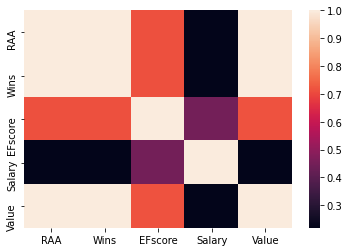

In [10]:
sns.heatmap(df.corr()) #Checking inter-correlations among parameters

In [11]:
#dataframe for numerical cols
num_data = df[['RAA','Wins','EFscore','Salary','Value']]
num_data

,RAA,Wins,EFscore,Salary,Value
0,410,1.414,0.224,1953130.0,2742662.0
1,307,1.060,0.242,1328130.0,2200658.0
2,305,1.053,0.176,2343750.0,2189940.0
3,295,1.018,0.200,156250.0,2136352.0
4,288,0.994,0.217,1718750.0,2099606.0
...,...,...,...,...,...
306,-180,-0.607,0.081,714300.0,-297218.0
307,-191,-0.646,0.061,468750.0,-353939.0
308,-215,-0.726,0.067,31250.0,-470290.0
309,-251,-0.848,0.066,1375000.0,-647724.0


In [12]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAA      311 non-null    int64  
 1   Wins     311 non-null    float64
 2   EFscore  311 non-null    float64
 3   Salary   308 non-null    float64
 4   Value    311 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 12.3 KB


In [13]:
num_data.describe()

,RAA,Wins,EFscore,Salary,Value
count,311.000000,311.000000,311.000000,3.080000e+02,3.110000e+02
mean,0.009646,-0.000016,0.059695,5.815845e+05,5.814855e+05
std,105.942939,0.361591,0.053649,5.930007e+05,5.395401e+05
min,-292.000000,-0.988000,0.000000,1.500000e+04,-8.798860e+05
25%,-57.000000,-0.195000,0.014500,1.192975e+05,2.917925e+05
50%,-21.000000,-0.072000,0.046000,4.062500e+05,4.721500e+05
75%,53.000000,0.181000,0.092000,8.750000e+05,8.517575e+05
max,410.000000,1.414000,0.242000,2.656250e+06,2.742662e+06


In [14]:
# null counts
num_data.isnull().sum()

RAA        0
Wins       0
EFscore    0
Salary     3
Value      0
dtype: int64

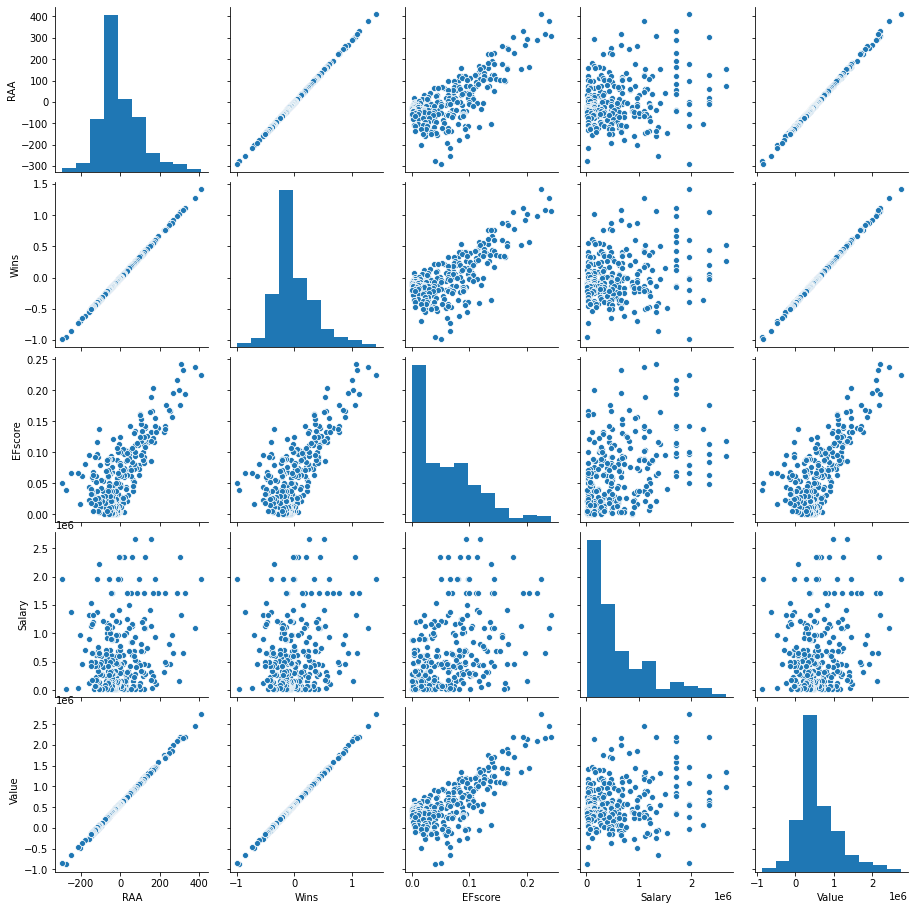

In [15]:
sns.pairplot(num_data)

From looking at the diagrams above, the data looks like it could be fit using algorithms like linear regression, lasso regression, etc. 

Before finalising a regression model for prediction, lets first analyse all the possible regression models that could potentially be used for the data. To do the same, I have used **PyCaret**.

### ML Models Analysis using PyCaret

In [16]:
from pycaret.regression import *

In [17]:
reg = setup(data = df, 
             target = 'Value',
             numeric_imputation = 'mean',
             ignore_features = ['Player','Team'],
             normalize = True,
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4829
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(311, 7)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
compare_models()   #compare all models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,11734.730400,217614819.728600,14572.138300,0.999200,0.203100,0.000500
1,Lasso Regression,11734.049000,217592671.125200,14571.433500,0.999200,0.203200,0.000500
2,Least Angle Regression,11734.730400,217614819.728600,14572.138300,0.999200,0.203100,0.000500
3,Lasso Least Angle Regression,11730.741600,217468879.120100,14567.811400,0.999200,0.203300,0.000500
4,Orthogonal Matching Pursuit,11619.170900,212157275.186700,14380.751300,0.999200,0.193300,0.001200
5,Random Sample Consensus,11734.730400,217614819.728600,14572.138300,0.999200,0.203100,0.000500
6,TheilSen Regressor,11804.670200,220852041.082000,14678.046800,0.999200,0.211600,0.001400
7,Ridge Regression,11749.853700,234034499.002300,15123.906100,0.999100,0.299100,-0.000500
8,Huber Regressor,12005.768100,347869392.907200,18267.645400,0.998600,0.187100,-0.003300
9,Extra Trees Regressor,17377.775500,2266266051.934900,30128.771200,0.993200,0.161800,-0.005700


From the above comparison, **Orthogonal Matching Pursuit** model looks like the most adequate in this case. 

In [19]:
omp = create_model('omp')   #Model creation

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14066.2763,2.867013e+08,16932.2568,0.9993,0.3347,0.0357
1,10921.6562,1.925979e+08,13877.9652,0.9990,0.1413,0.0076
2,12405.8754,2.345654e+08,15315.5288,0.9993,0.2173,-0.0475
3,9193.8666,1.358750e+08,11656.5435,0.9992,0.0700,-0.0072
4,9663.6509,1.312321e+08,11455.6587,0.9992,0.2746,-0.0100
5,9643.7790,1.690611e+08,13002.3497,0.9992,0.0517,0.0127
6,9779.5336,1.373848e+08,11721.1271,0.9993,0.1073,-0.0003
7,14106.4801,3.355120e+08,18316.9873,0.9991,0.1417,0.0010
8,12013.4232,2.211114e+08,14869.8165,0.9993,0.0555,0.0111
9,14397.1680,2.775316e+08,16659.2792,0.9991,0.5391,0.0083


In [20]:
omp

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [21]:
tuned_omp = tune_model('omp')    #Tuning hyperparameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14066.2763,2.867013e+08,16932.2568,0.9993,0.3347,0.0357
1,10921.6562,1.925979e+08,13877.9652,0.9990,0.1413,0.0076
2,12405.8754,2.345654e+08,15315.5288,0.9993,0.2173,-0.0475
3,9193.8666,1.358750e+08,11656.5435,0.9992,0.0700,-0.0072
4,9663.6509,1.312321e+08,11455.6587,0.9992,0.2746,-0.0100
5,9643.7790,1.690611e+08,13002.3497,0.9992,0.0517,0.0127
6,9779.5336,1.373848e+08,11721.1271,0.9993,0.1073,-0.0003
7,14106.4801,3.355120e+08,18316.9873,0.9991,0.1417,0.0010
8,12013.4232,2.211114e+08,14869.8165,0.9993,0.0555,0.0111
9,14397.1680,2.775316e+08,16659.2792,0.9991,0.5391,0.0083


In [22]:
tuned_omp

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=1,
                          normalize=False, precompute='auto', tol=None)

In [24]:
# evaluate_model(tuned_omp)

In [90]:
# import pickle
# pickle.dump(tuned_omp, open('model.pkl','wb'))